In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [9]:
data=pd.read_csv(r"D:/Machine_Learning/Data_sets/linearRegression_insurance-main/insurance.csv")

In [10]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [12]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


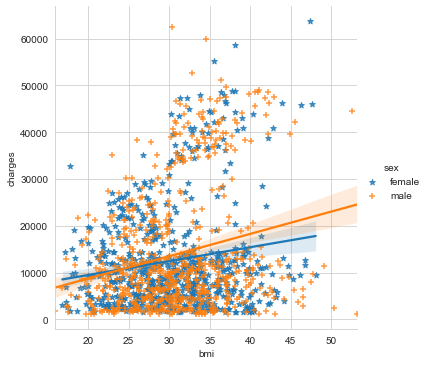

In [17]:
sb.lmplot(x='bmi',y='charges',data=data,hue="sex", markers=['*','+'])

plt.show()

# separating feature and target

In [21]:
X_feature=data.iloc[:,0:6]
Y_target=data.iloc[:,6]

In [22]:
X_feature.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [24]:
data.shape

(1338, 7)

In [23]:
pd.get_dummies(data)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [25]:
encoded_data=pd.get_dummies(X_feature)
encoded_data.shape

(1338, 11)

In [26]:
encoded_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


# Splitting in testing and training

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(encoded_data,Y_target,test_size=.30,random_state=101)

In [33]:
Xtrain.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
405,52,38.380,2,1,0,1,0,1,0,0,0
835,42,35.970,2,0,1,1,0,0,0,1,0
483,51,39.500,1,1,0,1,0,0,0,0,1
319,32,37.335,1,0,1,1,0,1,0,0,0
956,54,30.800,1,0,1,0,1,0,0,1,0


# Training

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
trainer=LinearRegression()
learner=trainer.fit(Xtrain,Ytrain)

# Testing

In [37]:
Yp=learner.predict(Xtest)
Ya=Ytest

In [40]:
m=learner.coef_
m

array([   241.27878731,    367.1887526 ,    494.29061749,    -26.06773199,
           26.06773199, -11731.78243447,  11731.78243447,    325.94169916,
          495.76797647,   -267.00328737,   -554.70638826])

In [41]:
c=learner.intercept_
c

-1128.0129042153349

# Error

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
error=np.sqrt(mean_squared_error(Ya,Yp))
error

5803.762514494926

In [45]:
Yp_age=m[0]*Xtest.iloc[:,0]+c+error

# Predict_age vs charge

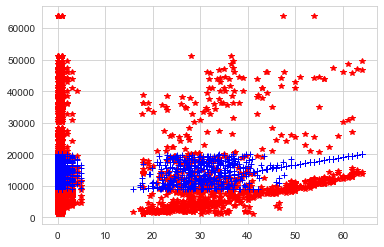

In [46]:
plt.plot(Xtest,Ytest,'r*')
plt.plot(Xtest,Yp_age,'b+')
plt.show()
